# Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from glob import glob
import seaborn as sns
from typing import List

# Data Loading

In [3]:
# Get all the file paths
paths = glob("../data/*.arff")

In [4]:
dfs: List[pd.DataFrame] = []

# Load the arff data into a pandas dataframe
for path in paths:
    data, meta = arff.loadarff(path)
    df = pd.DataFrame(data)
    dfs.append(df)

In [5]:
# We will do EDA on the PC1 dataset
pc1_df = dfs[8]

In [6]:
pc1_df.head()

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PATHOLOGICAL_COMPLEXITY,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,0.0,5.0,1.0,0.0,0.0,8.0,3.0,0.38,4.0,2.00,...,0.33,17.0,24.0,5.0,10.0,9.0,1.0,0.00,8.0,b'N'
1,1.0,3.0,2.0,0.0,0.0,4.0,2.0,0.40,2.0,2.00,...,0.29,10.0,10.0,7.0,8.0,7.0,1.0,0.00,5.0,b'N'
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.00,0.0,NaN,...,1.00,0.0,2.0,0.0,2.0,1.0,1.0,0.00,0.0,b'N'
3,18.0,19.0,5.0,1.0,58.0,34.0,10.0,0.16,16.0,2.13,...,0.07,177.0,215.0,55.0,25.0,138.0,1.0,49.58,61.0,b'N'
4,2.0,3.0,0.0,0.0,9.0,4.0,2.0,0.20,2.0,2.00,...,0.09,33.0,35.0,17.0,7.0,22.0,1.0,47.37,10.0,b'N'


## Data Types

In [7]:
# The Defective column is of type object, we need to convert it to a boolean
pc1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1107 non-null   float64
 1   BRANCH_COUNT                     1107 non-null   float64
 2   CALL_PAIRS                       1107 non-null   float64
 3   LOC_CODE_AND_COMMENT             1107 non-null   float64
 4   LOC_COMMENTS                     1107 non-null   float64
 5   CONDITION_COUNT                  1107 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            1107 non-null   float64
 7   CYCLOMATIC_DENSITY               1107 non-null   float64
 8   DECISION_COUNT                   1107 non-null   float64
 9   DECISION_DENSITY                 759 non-null    float64
 10  DESIGN_COMPLEXITY                1107 non-null   float64
 11  DESIGN_DENSITY                   1107 non-null   float64
 12  EDGE_COUNT          

In [52]:
# The majority of the values are b'N'
df["Defective"].value_counts()

Defective
b'N'    16670
b'Y'      516
Name: count, dtype: int64

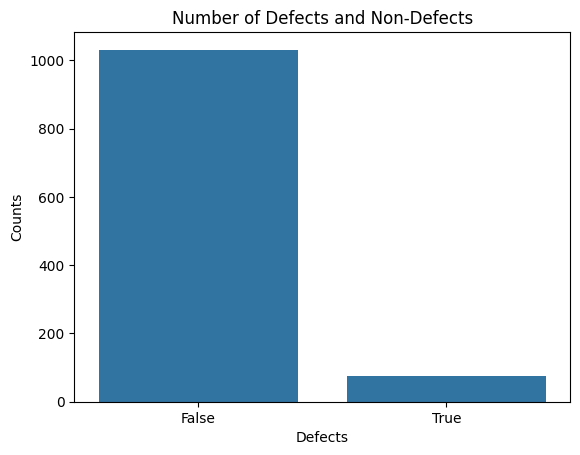

In [51]:
sns.countplot(x="Defective", data=pc1_df)
plt.xlabel("Defects")
plt.ylabel("Counts")
plt.title("Number of Defects and Non-Defects")
plt.show()

As the data is not balanced, we will use different metrics other than accuracy to evaluate the models. We will use the F1 score, precision, recall, and the ROC AUC score.

And will experiment with Synthetic Minority Over-sampling Technique `SMOTE` to balance the data.

## Missing Values

In [10]:
# All the missing values are in the DECISION_DENSITY column
pc1_df.isna().sum()

LOC_BLANK                            0
BRANCH_COUNT                         0
CALL_PAIRS                           0
LOC_CODE_AND_COMMENT                 0
LOC_COMMENTS                         0
CONDITION_COUNT                      0
CYCLOMATIC_COMPLEXITY                0
CYCLOMATIC_DENSITY                   0
DECISION_COUNT                       0
DECISION_DENSITY                   348
DESIGN_COMPLEXITY                    0
DESIGN_DENSITY                       0
EDGE_COUNT                           0
ESSENTIAL_COMPLEXITY                 0
ESSENTIAL_DENSITY                    0
LOC_EXECUTABLE                       0
PARAMETER_COUNT                      0
GLOBAL_DATA_COMPLEXITY               0
GLOBAL_DATA_DENSITY                  0
HALSTEAD_CONTENT                     0
HALSTEAD_DIFFICULTY                  0
HALSTEAD_EFFORT                      0
HALSTEAD_ERROR_EST                   0
HALSTEAD_LENGTH                      0
HALSTEAD_LEVEL                       0
HALSTEAD_PROG_TIME       

We may consider the following strategies to handle missing values:
1. Remove rows with missing values
2. Impute missing values with mean, median, mode, or a constant value

## Duplicate Values

In [12]:
# We need to drop duplicates
pc1_df.duplicated().sum()

146

## Visualizations

In [14]:
pc1_df["Defective"] = pc1_df["Defective"].map({b"N": False, b"Y": True})

In [16]:
correlations = pc1_df.corr()

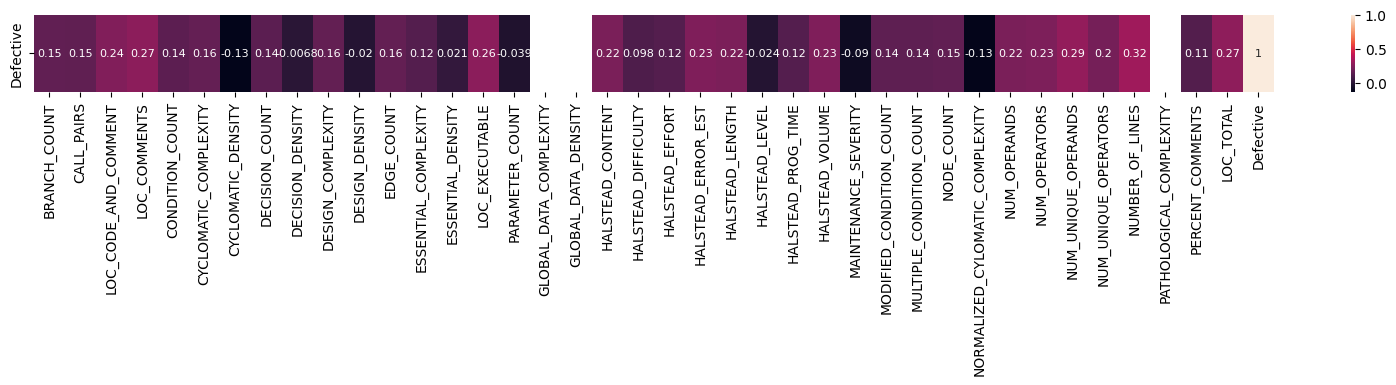

In [42]:
target_corr = correlations["Defective"][1:]

fig, ax = plt.subplots(figsize=(20, 1))
sns.heatmap(target_corr.to_frame().T, annot=True, ax=ax, annot_kws={"fontsize": 8})
plt.show()


Nearly all the attributes have weak correlation with the target variable, but `GLOBAL_DATA_COMPLEXITY`, `GLOBAL_DATA_DENSITY` don't correlate to the `Defective` target variable.


We may experiment with feature selection algorithms such as `RFE` to select the best features that correlate to the target variable.